# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import t

# Data Cleaning

In [2]:
df = pd.read_csv('people.csv')

df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace=True)

df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.duplicated().sum()

3008

In [7]:
dup = df[df.duplicated(keep='first')]
dup

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [8]:
df = df.drop_duplicates(keep='first')

df.shape

(11991, 10)

In [9]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

# EDA

In [10]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.describe(include='all')

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Normality Test

Check if the data is normally distributed or not in satisfactorylevel column using shapiro-wilk test

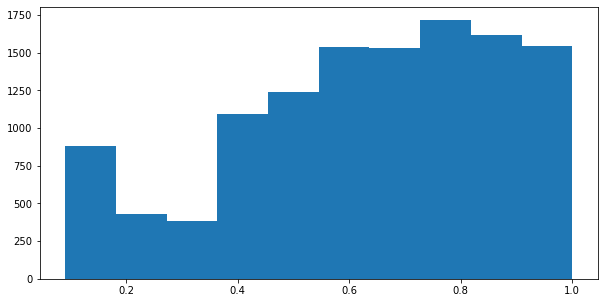

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df['satisfactoryLevel'])
plt.show()

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

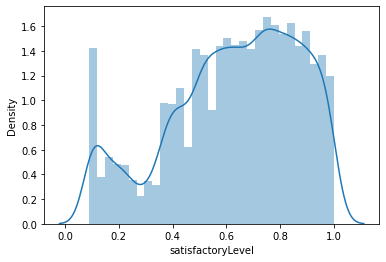

In [13]:
sns.distplot(df['satisfactoryLevel'])

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

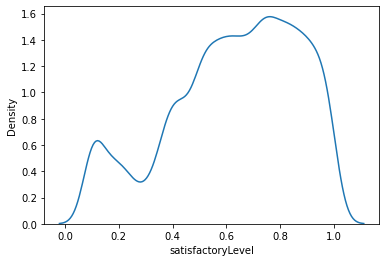

In [14]:
sns.kdeplot(x='satisfactoryLevel', data=df)

In [15]:
# h0: Data is normally distributed
# h1: Data is not normally distributed

stat,p_value = shapiro(df['satisfactoryLevel'])

p_value

0.0

In [16]:
stat

0.9526869654655457

since p value is less than 0.05, we can reject the null hypothesis. The data is not normally distributed

In [17]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [18]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Salary is a categorical data

In [19]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

#### Converting categorical data into numbers, using label encoder

In [20]:
df1=df

l1 = LabelEncoder()
df1['salary'] = l1.fit_transform(df1['salary'])

df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [21]:
df1['dept'] = l1.fit_transform(df1['dept'])

df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [22]:
df1['salary'].unique()

array([1, 2, 0])

In [23]:
df1['dept'].unique()

array([7, 2, 3, 9, 8, 0, 6, 5, 4, 1])

In [24]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
dept,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


#### Correlation Graph

<AxesSubplot:>

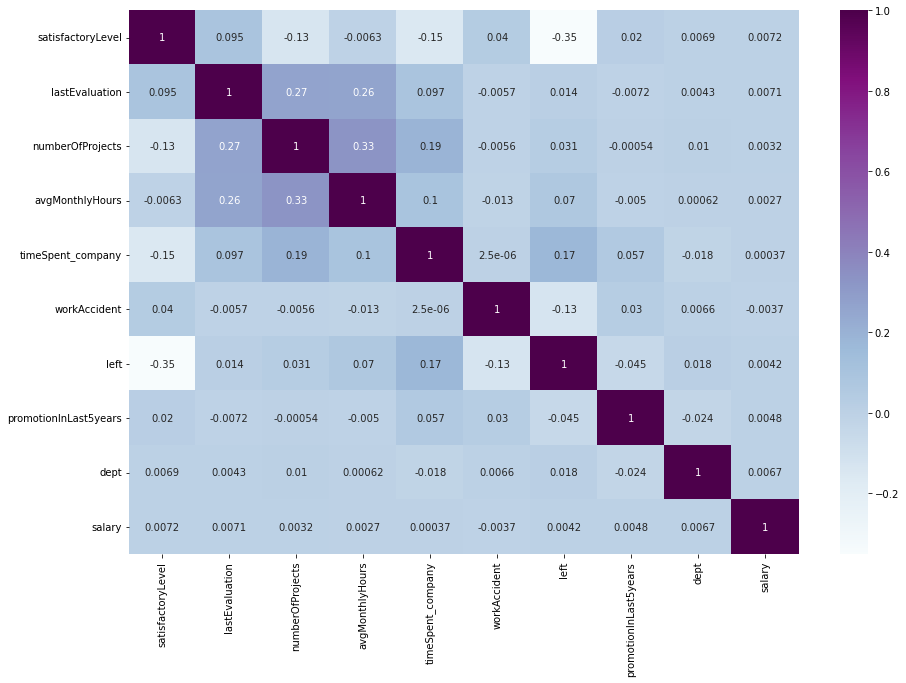

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, cmap='BuPu')

## Hypothesis Testing

In [26]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [27]:
df.shape

(11991, 10)

In [28]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,5.871153,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.899022,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


#### Random Experiment

In [29]:
emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2


In [30]:
emp.shape

(217, 10)

In [31]:
emp['left'].value_counts()

0    211
1      6
Name: left, dtype: int64

In [32]:
emp['left'].unique()

array([1, 0], dtype=int64)

In [33]:
emp['left'].nunique()

2

In [34]:
emp['salary'].value_counts()

1    114
2     89
0     14
Name: salary, dtype: int64

In [35]:
emp.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.021638,-0.217151,0.024962,NaN,0.025751,-0.215200,0.047443,-0.113350,0.030787
lastEvaluation,0.021638,1.000000,0.094969,0.001310,NaN,-0.002001,0.122231,-0.089724,0.003506,0.007181
numberOfProjects,-0.217151,0.094969,1.000000,-0.047254,NaN,-0.064793,0.115917,-0.020698,0.050600,-0.153083
avgMonthlyHours,0.024962,0.001310,-0.047254,1.000000,NaN,-0.053849,-0.043436,0.043453,0.032331,-0.002823
timeSpent_company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workAccident,0.025751,-0.002001,-0.064793,-0.053849,NaN,1.000000,-0.072686,0.018301,0.118904,0.069108
left,-0.215200,0.122231,0.115917,-0.043436,NaN,-0.072686,1.000000,-0.025897,0.053947,-0.003477
promotionInLast5years,0.047443,-0.089724,-0.020698,0.043453,NaN,0.018301,-0.025897,1.000000,-0.069426,0.065548
dept,-0.113350,0.003506,0.050600,0.032331,NaN,0.118904,0.053947,-0.069426,1.000000,0.069257
salary,0.030787,0.007181,-0.153083,-0.002823,NaN,0.069108,-0.003477,0.065548,0.069257,1.000000


In [36]:
emp['avgMonthlyHours'].mean()

167.2258064516129

## t-test
#### One sample t-test

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

**Condition:** Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200

In [37]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
7,0.42,0.53,2,142,3,0,1,0,7,1
8,0.45,0.54,2,135,3,0,1,0,7,1


In [38]:
employee.shape

(1462, 10)

**null hypothesis:** avg monthly hours of a employee having 2 yrs exp and the employee more than that is same i.e, 167 hrs 
**alternate hypothesis:** avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee


In [39]:
# Selecting a random sample
sample_size = 100
sample1 = employee.sample(sample_size, random_state=0)
# random_state=0 makes sure we get the same set of random samples everytime

In [40]:
sample1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1685,0.17,0.76,4,171,5,0,0,0,6,1
11633,0.46,0.46,2,145,3,0,1,0,0,0
1250,0.45,0.53,2,159,3,0,1,0,7,1
774,0.45,0.49,2,144,3,0,1,0,2,1
3506,0.50,0.38,5,175,4,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
27,0.38,0.46,2,137,3,0,1,0,9,1
6314,0.37,0.72,2,163,3,0,0,0,7,1
2083,0.45,0.39,2,167,3,0,0,0,8,2
5162,0.12,0.39,5,161,4,0,0,0,0,1


In [41]:
employee.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.366313,0.596464,2.956224,155.547880,3.584815,0.116279,0.526676,0.013680,5.770178,1.344733
std,0.101213,0.150941,1.307379,18.424461,1.154399,0.320669,0.499459,0.116198,2.889569,0.590974
min,0.100000,0.360000,2.000000,130.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320000,0.490000,2.000000,141.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
50%,0.390000,0.540000,2.000000,152.000000,3.000000,0.000000,1.000000,0.000000,7.000000,1.000000
75%,0.440000,0.670000,4.000000,166.000000,4.000000,0.000000,1.000000,0.000000,8.000000,2.000000
max,0.500000,1.000000,7.000000,200.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [42]:
# population mean
pos_mean = 167.23

# sample mean
sample1['avgMonthlyHours'].mean()

154.2

In [43]:
statistics, pvalue = ttest_1samp(sample1['avgMonthlyHours'], pos_mean)
statistics, pvalue

(-6.935268455452188, 4.2143717765508906e-10)

In [44]:
# Degrees of freedom
n=len(employee['avgMonthlyHours'])
dof=n-1
n, dof

(1462, 1461)

In [45]:
# dof = 99
alpha = 0.05

cv = t.ppf([alpha/2,1-alpha/2], dof)
cv

array([-1.96158904,  1.96158904])